# **Lab 2 - Sampling (Part 1)**

## Preliminaries: random number generation
In Python, specifically in numpy, we can generate pseudo-random numbers in $[0,1]$ with an approximated uniform distribution. This is achieved by the command $\textsf{rand}$ in the submodule $\textsf{numpy.random}$.

In [1]:
import numpy as np
np.random.rand(10)

array([0.26051527, 0.50469101, 0.01296137, 0.91913556, 0.74656427,
       0.07598951, 0.39537331, 0.12360262, 0.77191568, 0.50300805])

To ensure reproducibility, pseudo-randomness can be "initialized" by setting a fixed $\textsf{seed}$ value. This guarantees consistent results, even if the notebook is restarted and run again from the beginning.

In [2]:
np.random.seed(0)
np.random.rand()

0.5488135039273248

## The Uniform distribution

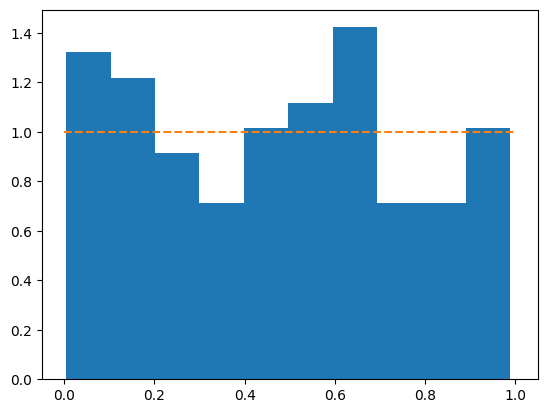

In [3]:
import matplotlib.pyplot as plt

np.random.seed(0)
n = 100
data= np.random.rand(n)
plt.hist(data, density=True)

xrange = np.linspace(0, 1, 1000)

f = lambda x: (x<=1)*(x>=0) + 0.0
plt.plot(xrange, f(xrange), '--')

/tmp/ipykernel_4874/1846189068.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0.5, 1.0, 'Empirical CDF vs true CDF')

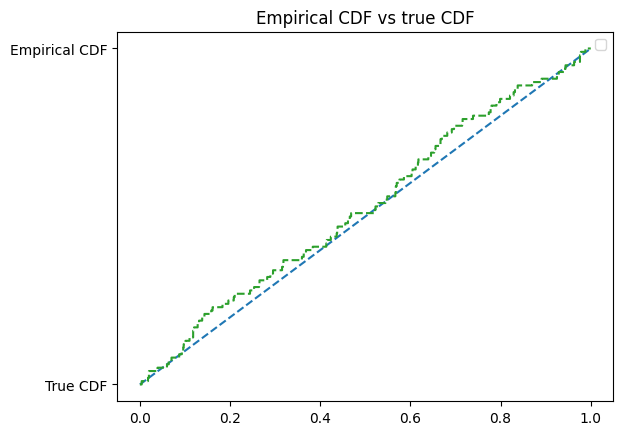

In [4]:
from scipy.stats import ecdf

# This notation helps us to plot the empirical CDF of data X up to datum x
empirical_cdf = lambda x: ecdf(data).cdf.evaluate(x)

true_cdf = lambda x: x
plt.plot(xrange, true_cdf(xrange), '--', "True CDF")
# This comes from (finite, discrete) data, so the function is continuous step-wise;
# thus, using plt.step is appropriate
plt.step(xrange, empirical_cdf(xrange), '--', "Empirical CDF")
plt.legend()
plt.title("Empirical CDF vs true CDF")

We can also test the difference between the theoretical and empirical distribution.

In [5]:
from scipy.stats import kstest

kstest(data, true_cdf)

KstestResult(statistic=np.float64(0.0736727958814345), pvalue=np.float64(0.6226614157861845), statistic_location=np.float64(0.7163272041185655), statistic_sign=np.int8(1))

## Sampling from a Bernoulli distribution

<mark>**Exercise 1**</mark></br>
We want to sample a Bernoulli random variable $X\sim Be(p)$:

$$P(X=1)=p,\quad\quad P(X=0)=1-p.$$

1. Show that if $U\sim\mathcal{U}([0,1])$ is a uniform random variable in $[0,1]$, then $X:=\mathbf{1}_{[0,p]}(U)$ has the desired distribution.

2. Draw 1000 sample of the variable $X\sim Be(p)$, with parameter $p=0.3$, and check the correctness of the numerical results, comparing mean, variance and comulative distribution function with the theoretical ones.



In [10]:
# Creating the datapoints from U and calculating Y = F^{-1}(U)
p = 0.3
u_samples = np.random.rand(1000)
f_samples = np.zeros(1000)
f_samples[u_samples <= 0.3] = 1

Text(0.5, 1.0, 'Empirical PDF vs true PDF')

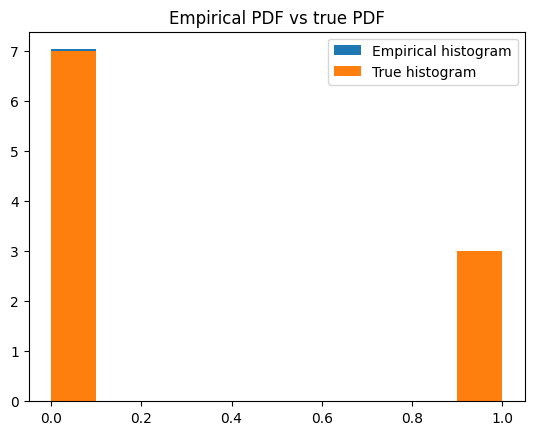

In [13]:
# PDF graph
true_pdf = np.concat([np.zeros(700), np.ones(300)])

plt.hist(f_samples, density=True, label="Empirical histogram")
plt.hist(true_pdf, density=True, label="True histogram")
plt.legend()
plt.title("Empirical PDF vs true PDF")

Text(0.5, 1.0, 'Empirical CDF vs true CDF')

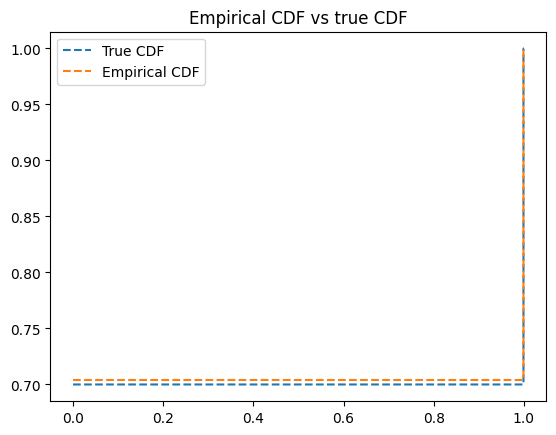

In [18]:
true_cdf = lambda x: ecdf(true_pdf).cdf.evaluate(x)
empirical_cdf = lambda x: ecdf(f_samples).cdf.evaluate(x)

plt.step(xrange, true_cdf(xrange), '--', label="True CDF")
# This comes from (finite, discrete) data, so the function is continuous step-wise;
# thus, using plt.step is appropriate
plt.step(xrange, empirical_cdf(xrange), '--', label="Empirical CDF")
plt.legend()
plt.title("Empirical CDF vs true CDF")

In [22]:
# Mean
print("Mean is:")
print(np.mean(f_samples))
print("Absolute error in the mean is:")
print(np.abs(np.mean(f_samples) - p))
print("Variance is")
print(np.var(f_samples))
print("Absolute error in the variance is:")
print(np.abs(np.var(f_samples) - p*(1-p)))

Mean is:
0.296
Absolute error in the mean is:
0.0040000000000000036
Variance is
0.208384
Absolute error in the variance is:
0.0016159999999999786


## The Inverse Transform Method

**Theorem 1**</br>
*Let $X$ be a continuous random variable taking values in $\mathbb{R}$ and $F : \mathbb{R} \to [0, 1]$ the corresponding CDF, i.e. $F(x) = P(X \le x).$ </br> The random variable $U = F(X)$ has a probability density which is uniform in $[0, 1]$.*

<mark>**Exercise 2**</mark></br>
Prove Theorem 1.


_____________________________________________
</br>

Theorem 1 suggests a general way to sample a continuous r.v. $X$: sample a uniform variable $U \sim \mathcal{U}([0, 1])$ and set $X = F^{-1}(U).$

We call this approach the **Inverse Transform Method**.
</br></br></br>
NB: this holds easily if $F$ is strictly monotone. If not, the idea can be adapted by replacing $F^{-1}$ with a suitable pseudo-inverse.

_____________________________________________

<mark>**Exercise 3**</mark></br>
Leveraging the inverse transform method, sample 1000 i.i.d. realizations from a random variable $X$ whose probability density function is $f(x)=2x$, supported over $[0,1]$. Check the correctness of the sample by comparing the histogram and the empirical distribution function with the exact values.


In [49]:
# Creating the datapoints from U and calculating Y = F^{-1}(U)
u_samples = np.random.rand(1000)
f_samples = np.sqrt(u_samples)

xrange = np.linspace(0, 1, 1000)

Text(0.5, 1.0, 'Empirical PDF vs true PDF')

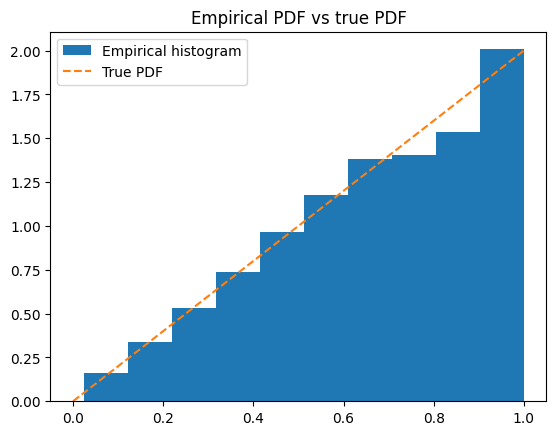

In [50]:
# PDF graph
true_pdf = lambda x: 2*x

plt.hist(f_samples, density=True, label="Empirical histogram")
plt.plot(xrange, true_pdf(xrange), '--', label="True PDF")
plt.legend()
plt.title("Empirical PDF vs true PDF")

Text(0.5, 1.0, 'Empirical CDF vs true CDF')

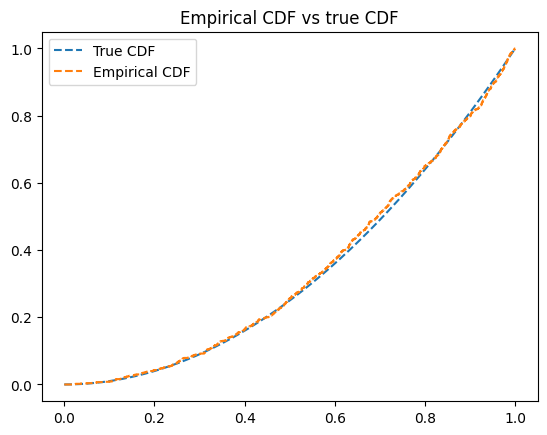

In [51]:
true_cdf = lambda x: x**2
empirical_cdf = lambda x: ecdf(f_samples).cdf.evaluate(x)

plt.plot(xrange, true_cdf(xrange), '--', label="True CDF")
# This comes from (finite, discrete) data, so the function is continuous step-wise;
# thus, using plt.step is appropriate
plt.step(xrange, empirical_cdf(xrange), '--', label="Empirical CDF")
plt.legend()
plt.title("Empirical CDF vs true CDF")

<mark>**Exercise 4 (Sampling from the unit disk)**</mark></br>
Let $D$ be the disk with center (0, 0) and radius 1. Let us denote by $X = (X_1, X_2)$ a random point in the disk, with uniform distribution (roughly speaking: each point of the disk is equiprobable). Denoting by $(R, \Theta)$ the polar coordinates, so that

$$X_1 = R \cos \Theta,\quad X_2 = R \sin \Theta,$$

which is the joint distribution
of $(R, \Theta)$? Are $R$ and $\Theta$ independent from each other? Finally, take advantage of the transformation into polar coordinates to draw 1000 points in the unit disk, with uniform distribution.


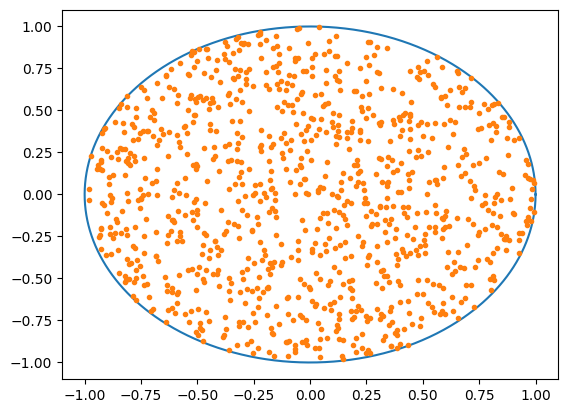

In [52]:
angles = np.linspace(0, 2*np.pi, 1000)
plt.plot(np.cos(angles), np.sin(angles))

n = 1000
r = np.random.rand(n)
theta = np.random.rand(n) * 2 * np.pi
plt.plot(np.sqrt(r)*np.cos(theta), np.sqrt(r)*np.sin(theta), '.')


<mark>**Exercise 5 (Exponential and Gamma random variables)**</mark></br>
Given any $\lambda>0$, let $Exp(\lambda)$ denote the exponential distribution, whose probability density function is

$$f_{\lambda}(x)=\lambda e^{-\lambda x}\cdot\mathbf{1}_{[0,+\infty)}(x).$$

1. Using the Inverse Transform Method, sample 1000 i.i.d. realizations of an exponential random variable $X\sim Exp(2)$. Compare empirical results with theoretical ones.

2. We now want to sample a Gamma random variable $Y \sim Gamma(m,\lambda)$, where $m=5$ and $\lambda=2$. Recall that, for $m\in\mathbb{N}$, the corresponding pdf reads</br>
$$f(x)=\frac{1}{(m-1)!}\lambda e^{-\lambda x}(\lambda x)^{m-1}\cdot\mathbf{1}_{[0,+\infty)}(x).$$
</br>Exploit (1) in a suitable way and sample 1000 independent random realizations of $Y$.

In [55]:
# Creating the datapoints from U and calculating Y = F^{-1}(U)
u_samples = np.random.rand(1000)
f_samples = -1/2 * np.log(u_samples)

xrange = np.linspace(0, 4, 1000)

Text(0.5, 1.0, 'Empirical PDF vs true PDF')

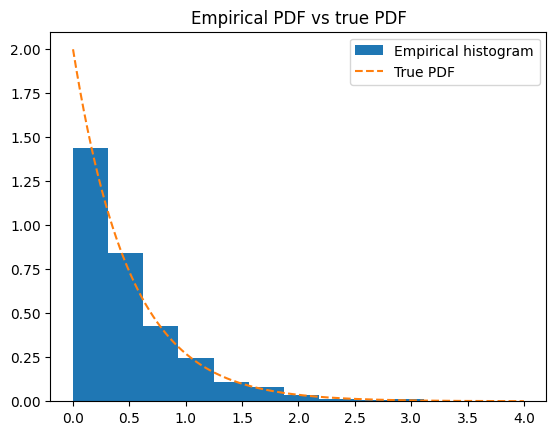

In [56]:
# PDF graph
true_pdf = lambda x: 2*np.exp(-2*x)

plt.hist(f_samples, density=True, label="Empirical histogram")
plt.plot(xrange, true_pdf(xrange), '--', label="True PDF")
plt.legend()
plt.title("Empirical PDF vs true PDF")

Text(0.5, 1.0, 'Empirical CDF vs true CDF')

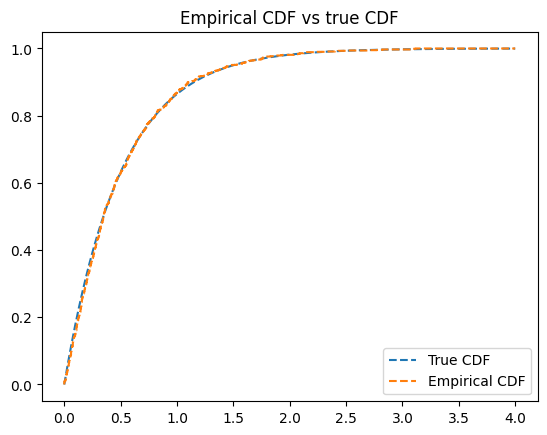

In [57]:
true_cdf = lambda x: 1 - np.exp(-2*x)
empirical_cdf = lambda x: ecdf(f_samples).cdf.evaluate(x)

plt.plot(xrange, true_cdf(xrange), '--', label="True CDF")
# This comes from (finite, discrete) data, so the function is continuous step-wise;
# thus, using plt.step is appropriate
plt.step(xrange, empirical_cdf(xrange), '--', label="Empirical CDF")
plt.legend()
plt.title("Empirical CDF vs true CDF")

In [ ]:
# Creating the datapoints from U and calculating Y = F^{-1}(U)
u_samples = np.random.rand(1000)
lam = 2
m = 5
Y = 0
for i in range(m):
    Y = Y + Xi
f_samples = -1/2 * np.log(u_samples)

xrange = np.linspace(0, 4, 1000)

Text(0.5, 1.0, 'Empirical PDF vs true PDF')

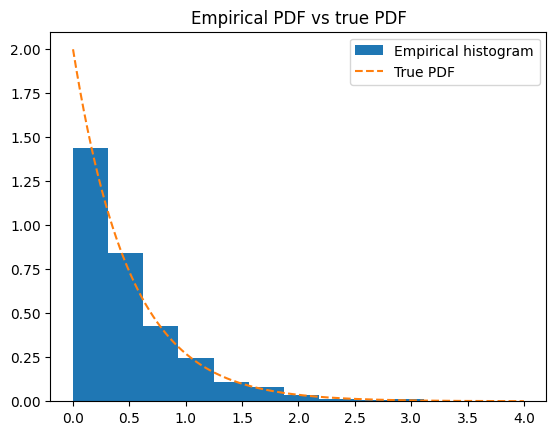

In [ ]:
# PDF graph
true_pdf = lambda x: 2*np.exp(-2*x)

plt.hist(f_samples, density=True, label="Empirical histogram")
plt.plot(xrange, true_pdf(xrange), '--', label="True PDF")
plt.legend()
plt.title("Empirical PDF vs true PDF")